# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/DSBA/Ensemble Techniques/EasyVisa.csv')

Mounted at /content/drive


In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
df.shape

(25480, 12)

Of the 12 columns, only 3 of them have numerical categories.

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.duplicated().sum()

0

We also observe there are no missing nor duplicate values to treat

In [ ]:
df = df.drop(['case_id'], axis=1)

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


We drop the unique values column as this has no relevant input for our model building

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

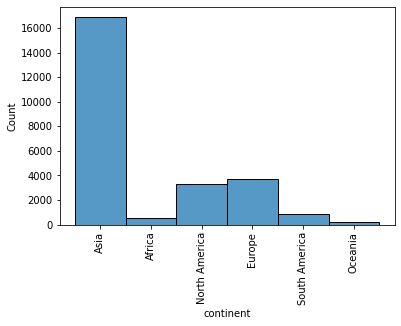

In [ ]:
sns.histplot(data = df, x="continent")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['continent'].value_counts(normalize=True)*100

Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64

The observations above show us that applications from Asia are the highest with 66.2% of the applicants while Oceania comes in at the lowest with 0.75%

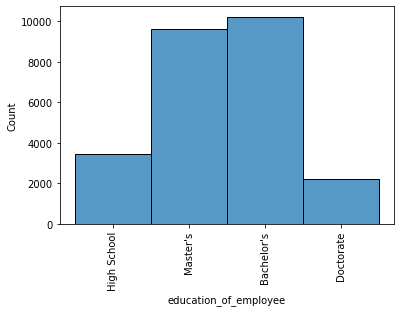

In [ ]:
sns.histplot(data = df, x="education_of_employee")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['education_of_employee'].value_counts(normalize=True)*100

Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64

The majority of the applicants have a BAchelor's degree (40%) while a small portion of them either have a doctorate (8.6%) or high school degree (13.4%)

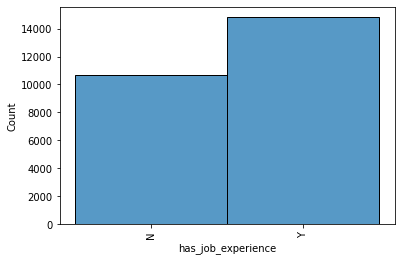

Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64

In [ ]:
sns.histplot(data = df, x="has_job_experience")
plt.xticks(rotation = 90)
plt.show()

df['has_job_experience'].value_counts(normalize=True)*100

Over 14000 applicants have job experience accounting for 58.1% of the applications

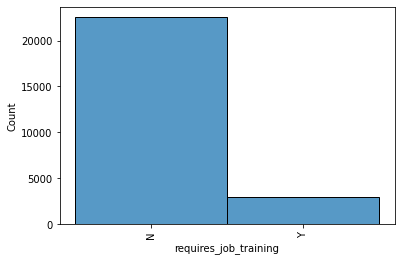

N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64

In [ ]:
sns.histplot(data = df, x="requires_job_training")
plt.xticks(rotation = 90)
plt.show()

df['requires_job_training'].value_counts(normalize=True)*100

88% of the applicants do not require any job training which shows a highly skilled set of applicants correlating with the high levels of education earlier analysed

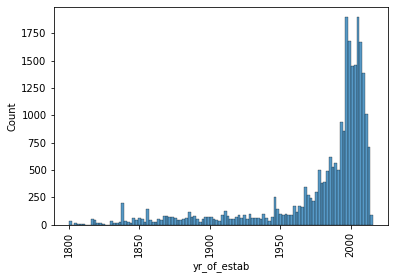

In [ ]:
sns.histplot(data = df, x="yr_of_estab")
plt.xticks(rotation = 90)
plt.show()

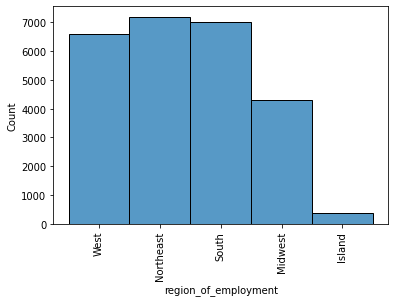

Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: region_of_employment, dtype: float64

In [ ]:
sns.histplot(data = df, x="region_of_employment")
plt.xticks(rotation = 90)
plt.show()

df['region_of_employment'].value_counts(normalize=True)*100

We observe that the most sought after region is the Northeast at 28.2%, followed by the South and then the West at 27.5% and 25.8% respectively. The Island region is the least sought after. A further analysis of specific states could provide useful information

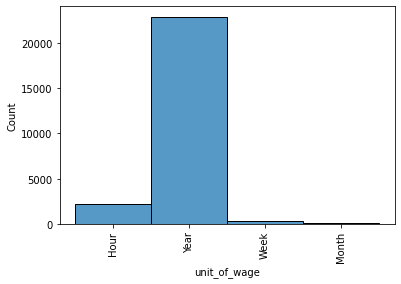

Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: unit_of_wage, dtype: float64

In [ ]:
sns.histplot(data = df, x="unit_of_wage")
plt.xticks(rotation = 90)
plt.show()

df['unit_of_wage'].value_counts(normalize=True)*100

90% of the workers are on a yearly wage while a very small fraction (0.35%) are on a montly wage.

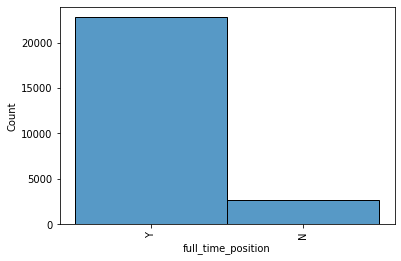

Y    89.375981
N    10.624019
Name: full_time_position, dtype: float64

In [ ]:
sns.histplot(data = df, x="full_time_position")
plt.xticks(rotation = 90)
plt.show()

df['full_time_position'].value_counts(normalize=True)*100

89.4% of the applicants are in full time positions while 10.6% are not.

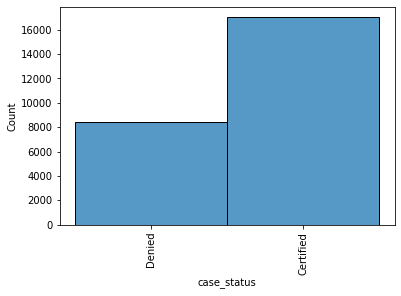

Certified    66.789639
Denied       33.210361
Name: case_status, dtype: float64

In [ ]:
sns.histplot(data = df, x="case_status")
plt.xticks(rotation = 90)
plt.show()

df['case_status'].value_counts(normalize=True)*100

Based on the dataset provided, we observe that 66.8% of the applications have been certifed and 33.2% have been denied. We will look at possible factors which affect this under bivariate/multivariate analysis

### Bivariate/Multivariate Analysis

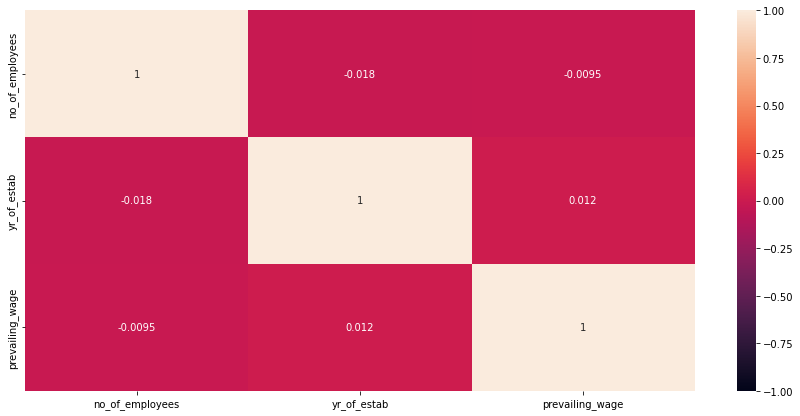

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

As there aren't a lot of numerical variables, the correlation map doesn't tell us a great lot

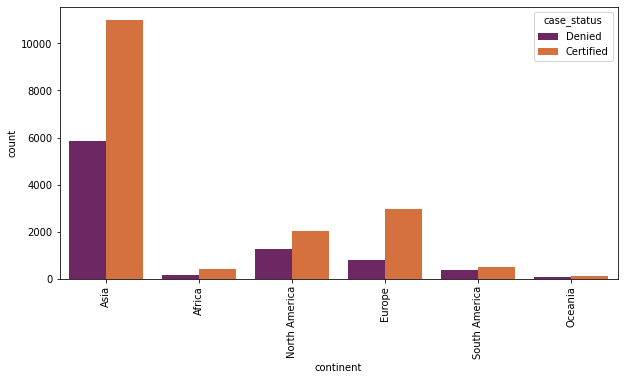

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='continent', hue='case_status', palette='inferno')
plt.xticks(rotation=90)
plt.show()

Asia has the highest number of certified applications while Oceania has the least. This could easily be becuae Asia has the highest number of applicants so this should be analysed further

In [ ]:
df_continent = df.groupby(['continent'])['case_status'].value_counts(normalize=True)*100
df_continent

continent      case_status
Africa         Certified      72.050817
               Denied         27.949183
Asia           Certified      65.310480
               Denied         34.689520
Europe         Certified      79.233655
               Denied         20.766345
North America  Certified      61.877278
               Denied         38.122722
Oceania        Certified      63.541667
               Denied         36.458333
South America  Certified      57.863850
               Denied         42.136150
Name: case_status, dtype: float64

Question 2 - In terms of percentages however, Europe has the highest certifed rate (79%) followed by Africa (72%) and then Asia (65%)

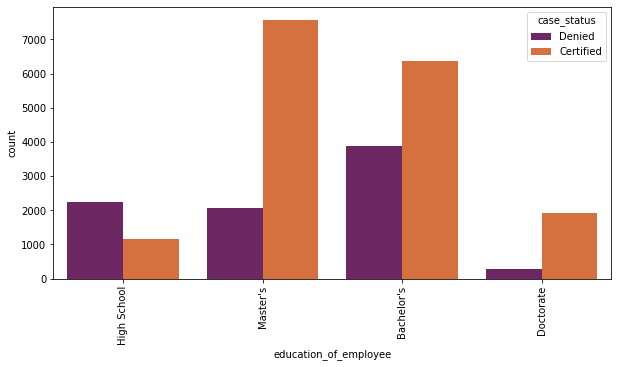

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education_of_employee', hue='case_status', palette='inferno')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_education_level = df.groupby(['education_of_employee'])['case_status'].value_counts(normalize=True)*100
df_education_level

education_of_employee  case_status
Bachelor's             Certified      62.214188
                       Denied         37.785812
Doctorate              Certified      87.226277
                       Denied         12.773723
High School            Denied         65.964912
                       Certified      34.035088
Master's               Certified      78.627777
                       Denied         21.372223
Name: case_status, dtype: float64

Question 1- We can observe a clear trend here. As the education level increases, the denied rate reduces from 34% (High School) to 12.8% (Doctorate). Education level does play a role in visa certification

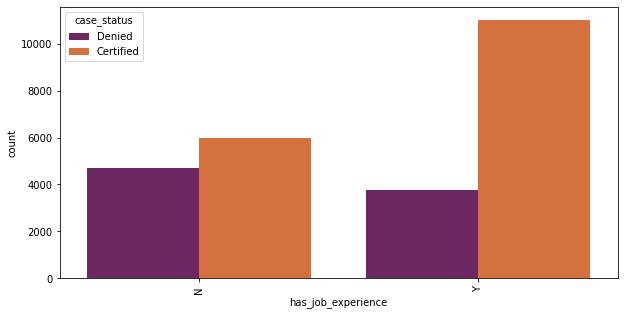

has_job_experience  case_status
N                   Certified      56.134108
                    Denied         43.865892
Y                   Certified      74.476422
                    Denied         25.523578
Name: case_status, dtype: float64

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='has_job_experience', hue='case_status', palette='inferno')
plt.xticks(rotation=90)
plt.show()

df_experience = df.groupby(['has_job_experience'])['case_status'].value_counts(normalize=True)*100
df_experience

43% of the applicants without job experience are denied compared to only 25% of those with job experience.

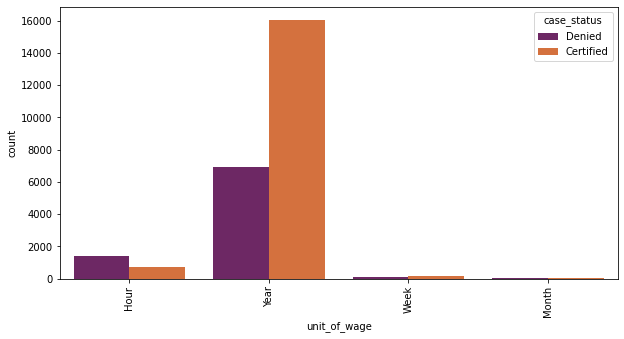

unit_of_wage  case_status
Hour          Denied         65.368567
              Certified      34.631433
Month         Certified      61.797753
              Denied         38.202247
Week          Certified      62.132353
              Denied         37.867647
Year          Certified      69.885027
              Denied         30.114973
Name: case_status, dtype: float64

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='unit_of_wage', hue='case_status', palette='inferno')
plt.xticks(rotation=90)
plt.show()

df_wage = df.groupby(['unit_of_wage'])['case_status'].value_counts(normalize=True)*100
df_wage

Applicants with a yearly Wage unit are most likely to be certified visas

In [ ]:
#df["unit_of_wage"] = df["unit_of_wage"].astype('object')
df.loc[df["unit_of_wage"]=="Hour", "unit_of_wage"] = "Not_Yearly"
df.loc[df["unit_of_wage"]=="Week", "unit_of_wage"] = "Not_Yearly"
df.loc[df["unit_of_wage"]=="Month", "unit_of_wage"] = "Not_Yearly"
df.loc[df["unit_of_wage"]=="Year", "unit_of_wage"] = "Yearly"
#df["unit_of_wage"] = data["unit_of_wage"].astype('category')

<AxesSubplot:xlabel='unit_of_wage', ylabel='Count'>

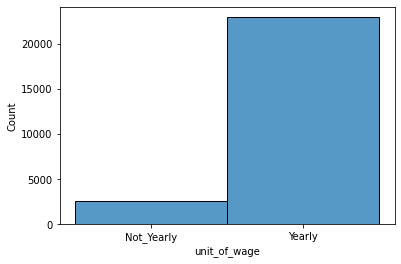

In [ ]:
sns.histplot(data=df, x='unit_of_wage')

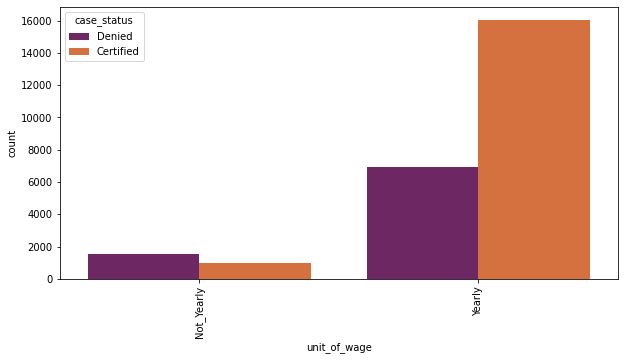

unit_of_wage  case_status
Not_Yearly    Denied         61.437649
              Certified      38.562351
Yearly        Certified      69.885027
              Denied         30.114973
Name: case_status, dtype: float64

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='unit_of_wage', hue='case_status', palette='inferno')
plt.xticks(rotation=90)
plt.show()

df_wage_1 = df.groupby(['unit_of_wage'])['case_status'].value_counts(normalize=True)*100
df_wage_1

In [ ]:
df['unit_of_wage'].value_counts(normalize=True)*100

Yearly        90.117739
Not_Yearly     9.882261
Name: unit_of_wage, dtype: float64

We have grouped the Unit of Wage variable into two categories, Yearly and Not_Yearly as the initial analysis shows the Yearly pay unit is most likely to be certified for a visa

We also observe that almost 70% of the cases are certified when the unit of wage is Yearly compared to 38.5% when it is Not Yearly

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

<AxesSubplot:xlabel='prevailing_wage'>

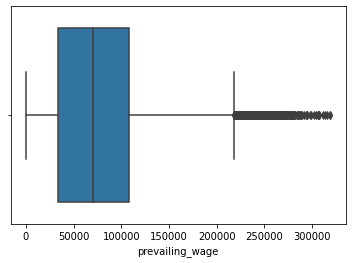

In [ ]:
sns.boxplot(data=df, x='prevailing_wage')

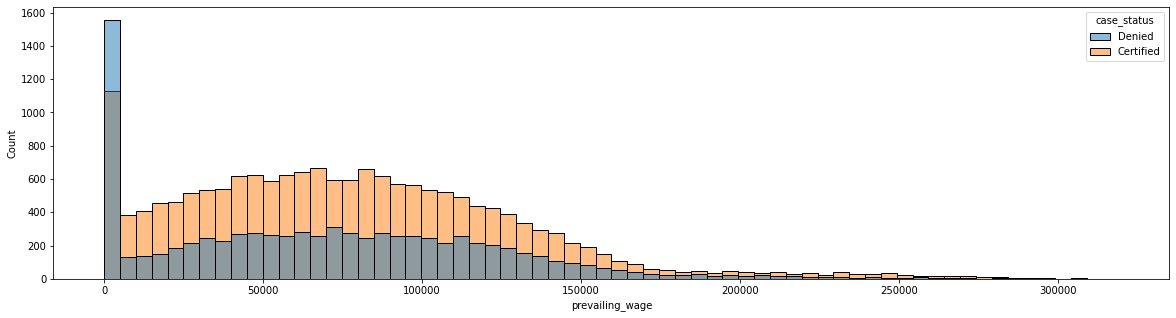

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="prevailing_wage", hue="case_status");

A high proportion of the denied cases occur when the prevailing wage is low (around zero)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

The key features to be engineered here will be the Yr_of_estab and no_of_employees. Unit of wage has already been previously engineered

### Feature Engineering

In [ ]:
df["no_of_employees"] = pd.cut( df["no_of_employees"], \
                                  [0, 2500, 7500, np.inf], \
                                  labels = ["Small_Sized(<2500employees)", \
                                            "Medium_Sized(2500-7500employees)", \
                                            "Large_Sized(>75000employees)"])

In [ ]:
df["yr_of_estab"] = pd.cut( df["yr_of_estab"], \
                                  [-np.inf, 1990, np.inf], \
                                  labels = ["Older_Estab(1800-1990)", \
                                            "Newer_Estab(>1990)"])

In [ ]:
df["case_status"] = df["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

In [ ]:
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,Large_Sized(>75000employees),Newer_Estab(>1990),West,592.2029,Not_Yearly,Y,0
1,Asia,Master's,Y,N,Small_Sized(<2500employees),Newer_Estab(>1990),Northeast,83425.6500,Yearly,Y,1
2,Asia,Bachelor's,N,Y,Large_Sized(>75000employees),Newer_Estab(>1990),West,122996.8600,Yearly,Y,0
3,Asia,Bachelor's,N,N,Small_Sized(<2500employees),Older_Estab(1800-1990),West,83434.0300,Yearly,Y,0
4,Africa,Master's,Y,N,Small_Sized(<2500employees),Newer_Estab(>1990),South,149907.3900,Yearly,Y,1
5,Asia,Master's,Y,N,Small_Sized(<2500employees),Newer_Estab(>1990),South,78252.1400,Yearly,Y,1
6,Asia,Bachelor's,N,N,Medium_Sized(2500-7500employees),Newer_Estab(>1990),South,53635.3900,Yearly,Y,1
7,North America,Bachelor's,Y,N,Medium_Sized(2500-7500employees),Older_Estab(1800-1990),West,418.2298,Not_Yearly,Y,0
8,Asia,Bachelor's,N,N,Medium_Sized(2500-7500employees),Newer_Estab(>1990),Midwest,74362.1900,Yearly,Y,1
9,Europe,Doctorate,Y,N,Small_Sized(<2500employees),Newer_Estab(>1990),South,67514.7600,Yearly,Y,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  object  
 1   education_of_employee  25480 non-null  object  
 2   has_job_experience     25480 non-null  object  
 3   requires_job_training  25480 non-null  object  
 4   no_of_employees        25447 non-null  category
 5   yr_of_estab            25480 non-null  category
 6   region_of_employment   25480 non-null  object  
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  object  
 9   full_time_position     25480 non-null  object  
 10  case_status            25480 non-null  int64   
dtypes: category(2), float64(1), int64(1), object(7)
memory usage: 1.8+ MB


In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
df['case_status'] = df['case_status'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25447 non-null  category
 5   yr_of_estab            25480 non-null  category
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(10), float64(1)
memory usage: 449.5 KB


## EDA

- It is a good idea to explore the data once again after manipulating it.

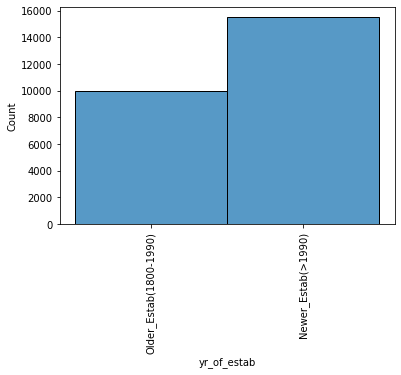

Newer_Estab(>1990)        60.949765
Older_Estab(1800-1990)    39.050235
Name: yr_of_estab, dtype: float64

In [ ]:
sns.histplot(data=df, x="yr_of_estab")
plt.xticks(rotation = 90)
plt.show()

df['yr_of_estab'].value_counts(normalize=True)*100

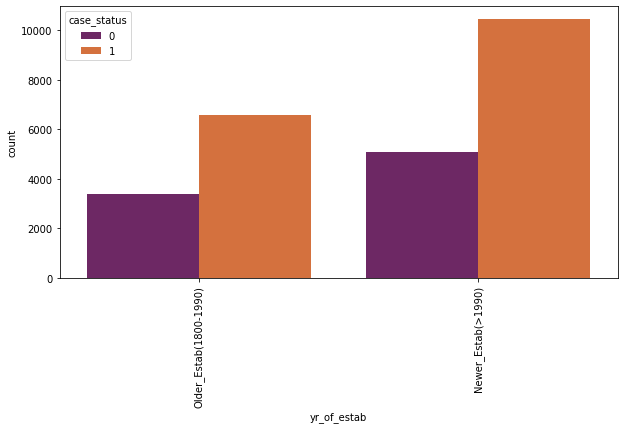

yr_of_estab              
Older_Estab(1800-1990)  1    66.140704
                        0    33.859296
Newer_Estab(>1990)      1    67.205409
                        0    32.794591
Name: case_status, dtype: float64

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='yr_of_estab', hue='case_status', palette='inferno')
plt.xticks(rotation=90)
plt.show()

df_estab = df.groupby(['yr_of_estab'])['case_status'].value_counts(normalize=True)*100
df_estab

We observe that 67% of applicants coming from newer establishments are certified compared to 66% for older establishments. Although we have a lot of applicants from newer establishments, this doesn't prove to be a major factor in terms of visa certification

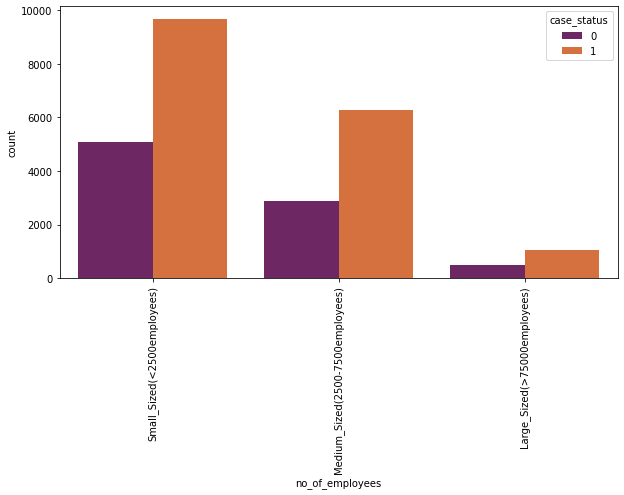

no_of_employees                    
Small_Sized(<2500employees)       1    65.550888
                                  0    34.449112
Medium_Sized(2500-7500employees)  1    68.576427
                                  0    31.423573
Large_Sized(>75000employees)      1    68.373299
                                  0    31.626701
Name: case_status, dtype: float64

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='no_of_employees', hue='case_status', palette='inferno')
plt.xticks(rotation=90)
plt.show()

df_employee_count = df.groupby(['no_of_employees'])['case_status'].value_counts(normalize=True)*100
df_employee_count

As with the Year of establishment variable, we see pretty similar certified visas across the 3 zies of employee counts

## Building bagging and boosting models

In [ ]:
X = df.drop("case_status", axis=1)
y = df.pop("case_status")

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

We will create functions to calculate different metrics - Accuracy, Recall and precision and plot the confusion matrix

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Bagging

In [ ]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
d_tree_score = get_metrics_score(d_tree)

Accuracy on training set :  1.0
Accuracy on test set :  0.652014652014652
Recall on training set :  1.0
Recall on test set :  0.7306562193927522
Precision on training set :  1.0
Precision on test set :  0.7437686939182453


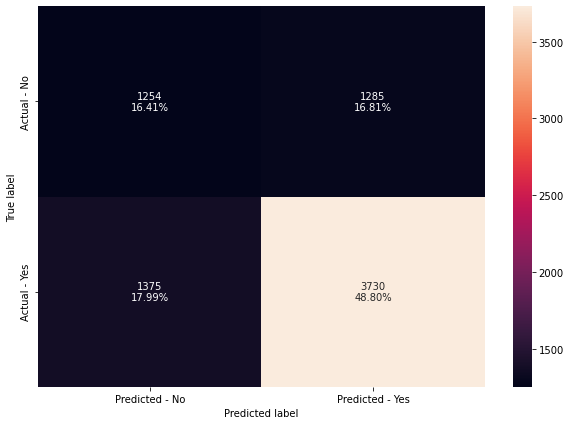

In [ ]:
make_confusion_matrix(d_tree,y_test)

The decision tree is clearly overfit on training data with an accuracy of 1 and poor performance on the test data set.

In [ ]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [ ]:
bagging_estimator_score = get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9785265754653509
Accuracy on test set :  0.6771323914181057
Recall on training set :  0.9790145219508101
Recall on test set :  0.7551420176297747
Precision on training set :  0.98872499152255
Precision on test set :  0.7599053814311059


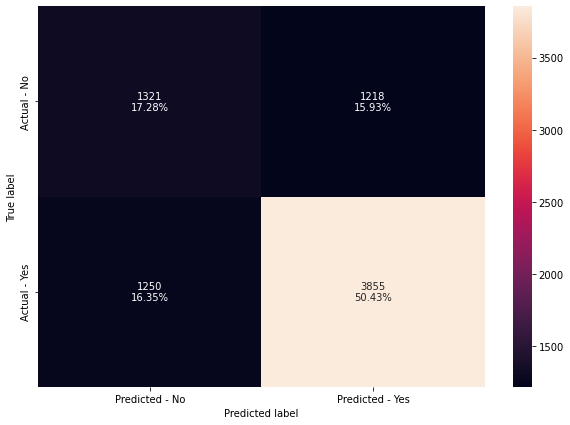

In [ ]:
make_confusion_matrix(bagging_estimator,y_test)

The bagging model is overfitting the data for the training data. We observe high Accuracy, precision and recall across board. The test data also experiences good figures but it can be improved

In [ ]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
rf_estimator_score = get_metrics_score(rf_estimator)

Accuracy on training set :  0.999887867234806
Accuracy on test set :  0.6801412872841445
Recall on training set :  0.9999160580878033
Recall on test set :  0.7692458374142997
Precision on training set :  0.9999160580878033
Precision on test set :  0.7560646900269542


The Random forest model experiences similar overfitting to the bagging estimator. These will need to be hypertuned

### Boosting

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.7378896613590491
Accuracy on test set :  0.7339089481946625
Recall on training set :  0.8847477545538487
Recall on test set :  0.8838393731635651
Precision on training set :  0.7614506574194481
Precision on test set :  0.7579371745338485


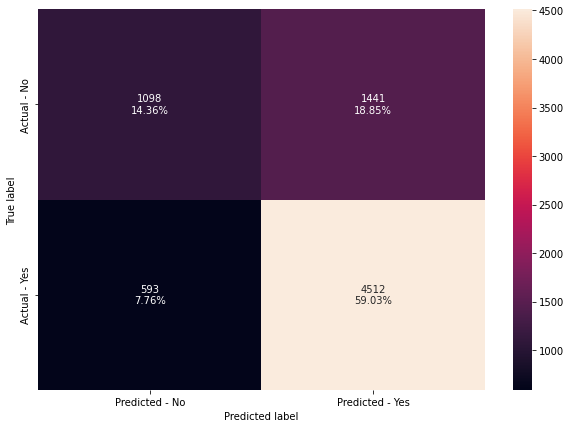

In [ ]:
make_confusion_matrix(abc,y_test)

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.7554384391119086
Accuracy on test set :  0.7473835688121402
Recall on training set :  0.8786199949634853
Recall on test set :  0.8758080313418217
Precision on training set :  0.7821116341627438
Precision on test set :  0.7751386962552012


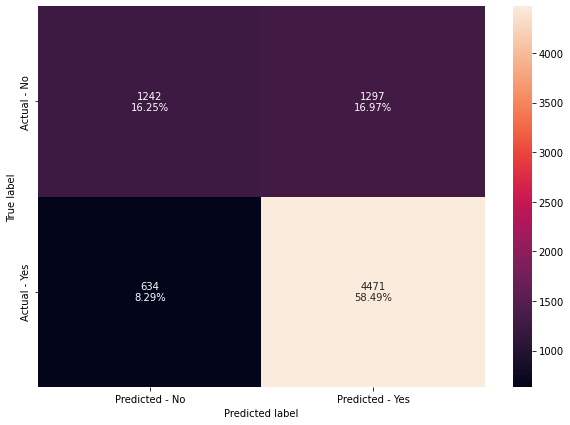

In [ ]:
make_confusion_matrix(gbc,y_test)

AdaBoost classifier has a higher test accuracy but Gradientboost classifier has the better test recall. Both models can be hypertuned to improve their parameters

##  Will tuning the hyperparameters improve the model performance?

### Bagging

In [ ]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

In [ ]:
dtree_estimator_score = get_metrics_score(dtree_estimator)

Accuracy on training set :  0.7125476564252075
Accuracy on test set :  0.706567242281528
Recall on training set :  0.9319231092084278
Recall on test set :  0.9308521057786484
Precision on training set :  0.7200674536256324
Precision on test set :  0.7154471544715447


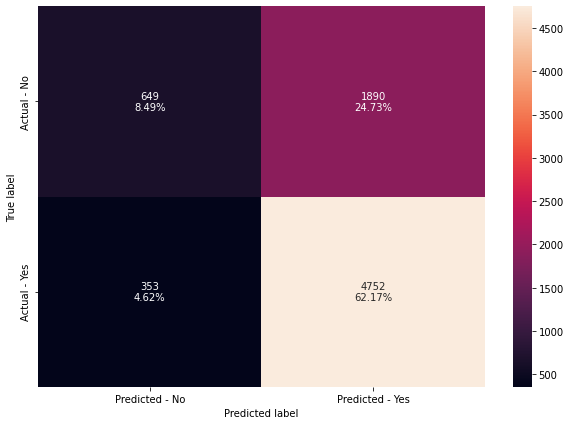

In [ ]:
make_confusion_matrix(dtree_estimator,y_test)

The tuned decision tree produces much better results and less overfitting on training data. We see 93% recall on both trainign and test data indicative of a decent model


In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples':[0.7,0.8,0.9,],
              'max_features': [0.7,0.8,0.9,],
              'n_estimators': [10,20,30,40,50],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

In [ ]:
bagging_estimator_tuned=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9531845705315093
Accuracy on test set :  0.7240973312401884
Recall on training set :  0.9921934021657013
Recall on test set :  0.8777668952007835
Precision on training set :  0.9409329724566152
Precision on test set :  0.7510895072075092


The bagging estimator still has some overfitting as the performances of the training and test datasets are still some way apart

In [ ]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [ ]:
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036


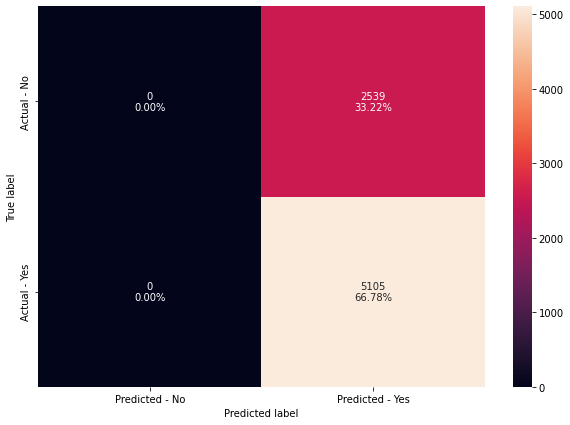

In [ ]:
make_confusion_matrix(bagging_lr,y_test)

The bagging classifier with logistic regression shows perfect recall on training and test data. The model may be a bit too perfect as such prcise results are hardly expected

In [ ]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": np.arange(20,120,40),
    "min_samples_leaf": np.arange(5, 15, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.3, min_samples_leaf=5,
                       n_estimators=20, random_state=1)

In [ ]:
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.7649136577708007
Accuracy on test set :  0.7434589220303506
Recall on training set :  0.8865944766221775
Recall on test set :  0.8781586679725759
Precision on training set :  0.7879737391823336
Precision on test set :  0.7700103057368601


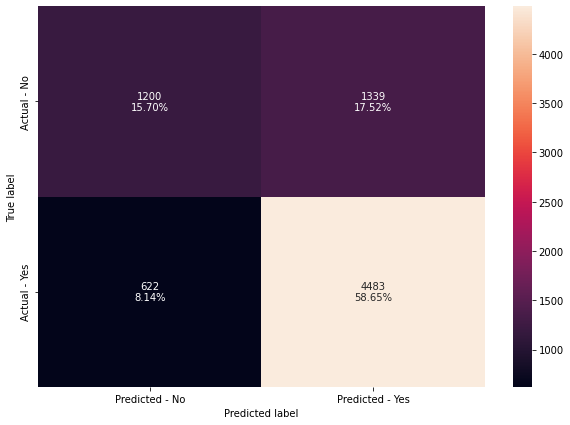

In [ ]:
make_confusion_matrix(rf_estimator_tuned,y_test)

In [ ]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.332, 1: 0.668}],
    "n_estimators": np.arange(20,120,40),
    "min_samples_leaf": np.arange(5,15,5),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.

In [ ]:
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.7192195559542498
Accuracy on test set :  0.7085295656724229
Recall on training set :  0.9742298329555947
Recall on test set :  0.9698334965719883
Precision on training set :  0.7117188937266204
Precision on test set :  0.7047686832740213


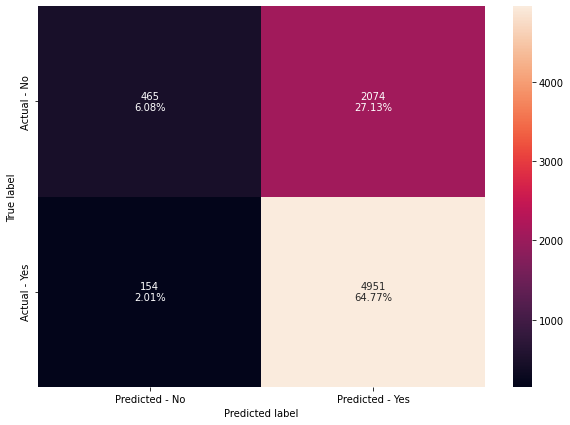

In [ ]:
make_confusion_matrix(rf_estimator_weighted,y_test)

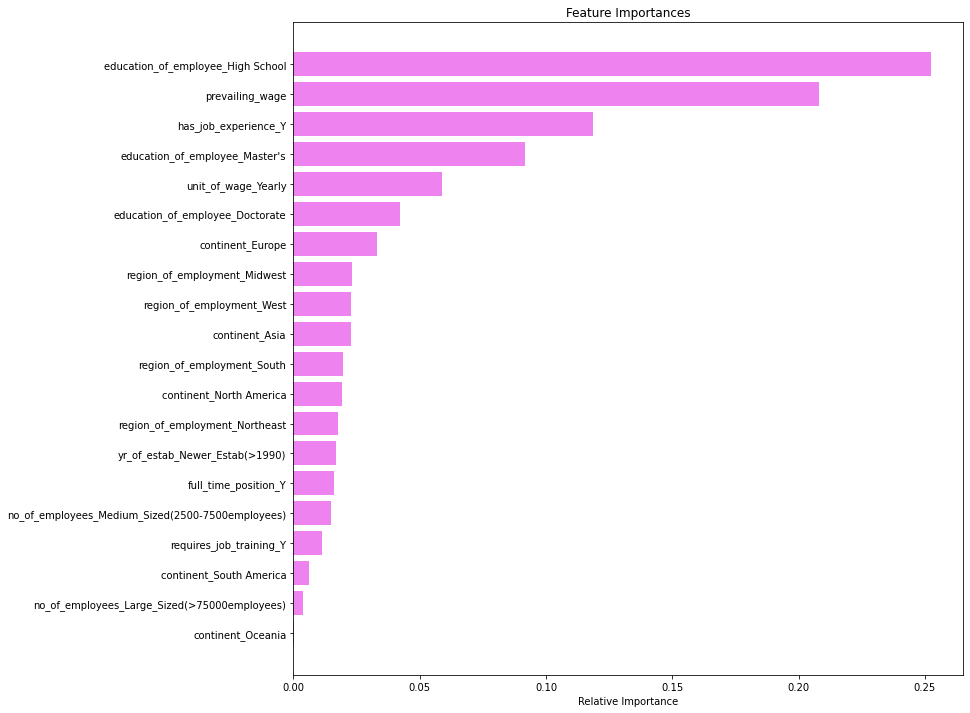

In [ ]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The wieghted random forest model performs better than the previous random forest model. There seems to be less overfitting and a better recall across both train and test data. 

The feature importance also shows that the education of the employee seems to be a very important factor the the visa not being certified.

### Boosting

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(20,120,40),
    "learning_rate":np.arange(0.2,2,0.6)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=20, random_state=1)

In [ ]:
abc_tuned_score = get_metrics_score(abc_tuned)

Accuracy on training set :  0.7180421619197129
Accuracy on test set :  0.7112768184196756
Recall on training set :  0.9361202048182657
Recall on test set :  0.9355533790401567
Precision on training set :  0.7232166018158236
Precision on test set :  0.7177637511271415


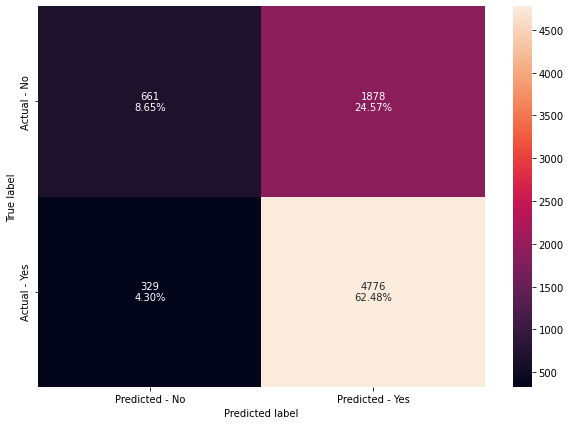

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

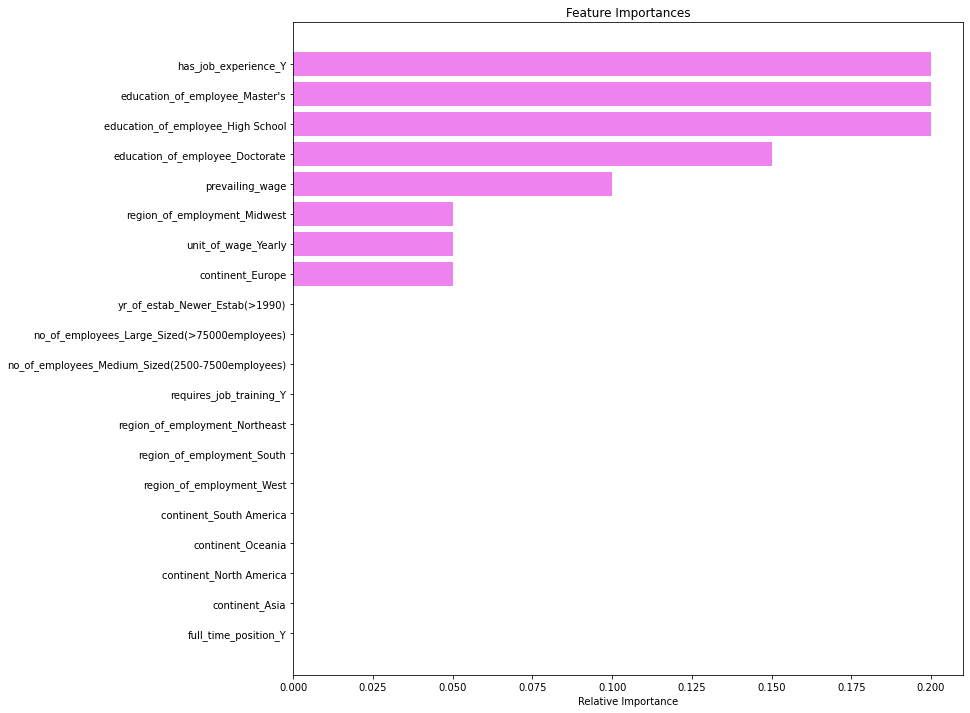

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,175,250],
    "subsample":[0.8,1],
    "max_features":[0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [ ]:
gbc_tuned_score = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.7362637362637363
Accuracy on test set :  0.7297226582940869
Recall on training set :  0.9034668009737262
Recall on test set :  0.9018609206660138
Precision on training set :  0.7517636376335824
Precision on test set :  0.7463122061922516


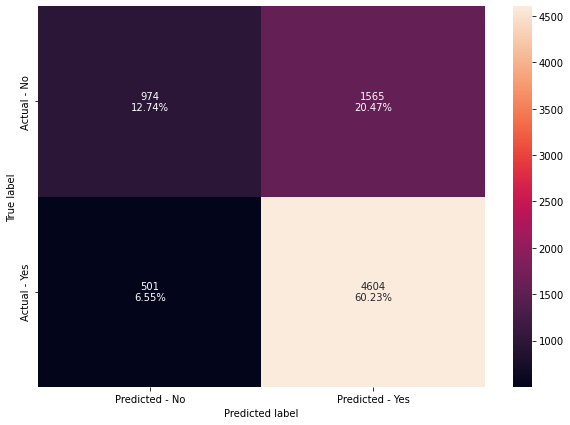

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

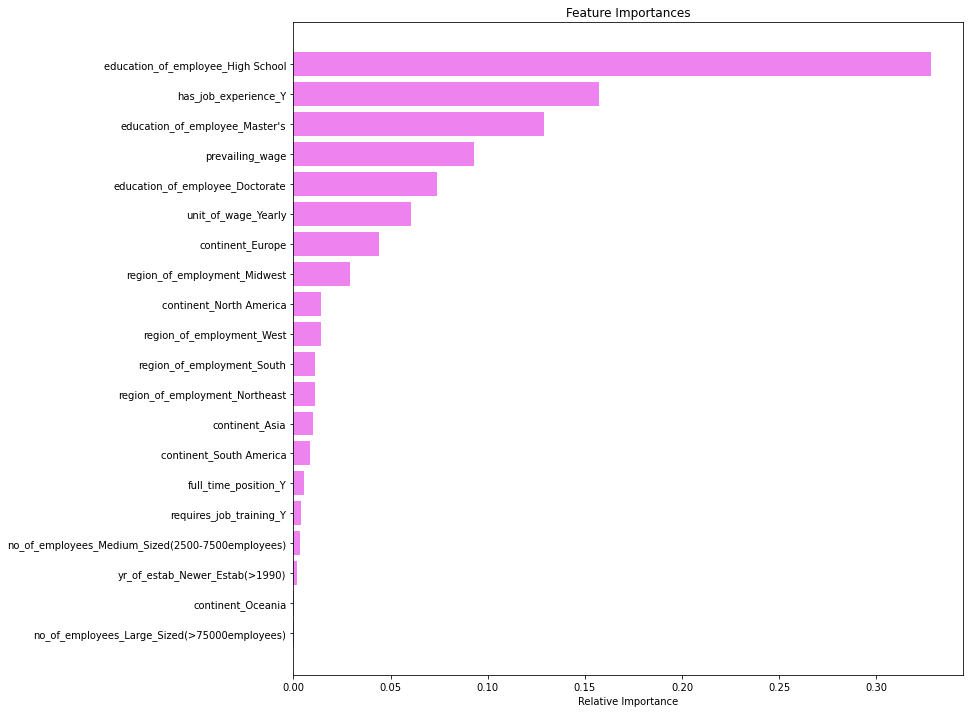

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Similar to the wighted random forest model, the education level is also the most important variable for the visa certification. 

## Model Performance Comparison and Conclusions

### Bagging

In [ ]:
# defining list of models
models = [d_tree, dtree_estimator, bagging_estimator,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]
#bagging_estimator_tuned,
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree', 'Decision Tree Tuned', 'Bagging classifier with default parameters',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.00,0.65,1.00,0.73,1.00,0.74
1,Decision Tree Tuned,0.71,0.71,0.93,0.93,0.72,0.72
2,Bagging classifier with default parameters,0.98,0.68,0.98,0.76,0.99,0.76
3,Bagging classifier with base_estimator=LR,0.67,0.67,1.00,1.00,0.67,0.67
4,Random Forest with deafult parameters,1.00,0.68,1.00,0.77,1.00,0.76
5,Tuned Random Forest Classifier,0.76,0.74,0.89,0.88,0.79,0.77
6,Random Forest with class_weights,0.72,0.71,0.97,0.97,0.71,0.70


## Boosting

In [ ]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_tuned,]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters',
                                          'Gradient Boosting Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.74,0.73,0.88,0.88,0.76,0.76
1,AdaBoost Tuned,0.72,0.71,0.94,0.94,0.72,0.72
2,Gradient Boosting with default parameters,0.76,0.75,0.88,0.88,0.78,0.78
3,Gradient Boosting Tuned,0.74,0.73,0.90,0.90,0.75,0.75


## Actionable Insights and Recommendations

### Insights


1.   The education of an employee is a very important variable to determine the chance of the visa getting denied.
2.   Job experience is also an important variable along with the unit of wage being paid. The most important continent seems to be Europe as they have the lowest number of denied applications
3.   The bagging classifier with logistic regression estimator gives a perfect recall on both train and test data which makes it the best performing model.
4.   However, has 100% recall is hardly expected and could also be an indicator of a flaw in the model, the weighted random forest shows the best performance at 0.97 followed by the Tuned Adaboost model with 0.94 recall. These are the models recommended for use






Recommendations

1.   Recall has been emphasized as the metric of interest here but other metrics could be explored to confirm any assertions.
2.   Interestingly, attributes like if the job opportunity is full time/ part time ; if an employee requires further job training ; the intended region of employment do not appear to be important. Some of these variables could be removed from the application process to focus on the more important variables
1.   Other parameters could be introduced to give a better understanding of the candidates. Parameters such as languages spoken, relevant certifications in the field could be used for better determination






